In [1]:
from path_explain import utils
utils.set_up_environment(visible_devices='3')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from train import load_mnist
from plot import colors
import shap
from path_explain.path_explainer_tf import PathExplainerTF

In [3]:
mpl.rcParams['figure.dpi'] = 75

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [5]:
model = tf.keras.models.load_model('model.h5')

In [6]:
pred_logits = model.predict(x_test)

In [7]:
pred_labels = np.argmax(pred_logits, axis=-1)

In [8]:
test_accuracy = np.sum(pred_labels == y_test) / y_test.shape[0]
print('Test accuracy: {}'.format(test_accuracy))

Test accuracy: 0.9913


In [9]:
cmap = colors.green_white_gold()

In [10]:
attributions = np.load('attributions.npy')

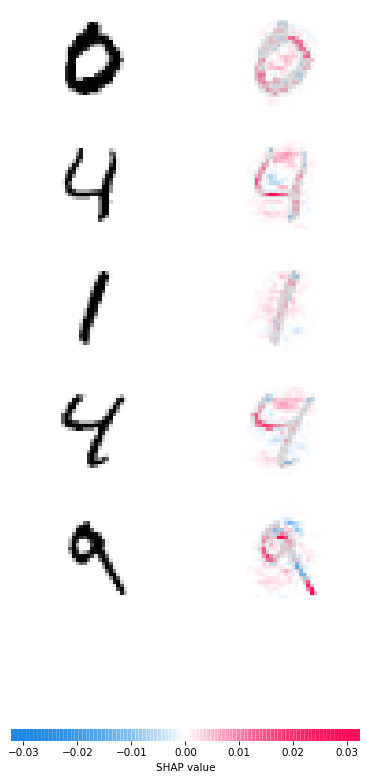

In [15]:
index = 3
shap.image_plot(attributions[index:index+5, :, :], -x_test[index:index+5, :, :])